# FUTURE SCALING
- 1) Min Max Scaler
- 2) Standard Scaler
- 3) Max Abs Scaler
- 4) Robust Scaler
- 5) Quantile Transformer Scaler
- 6) Power Transformer Scaler
- 7) Unit Vector Scaler

For the explanation, we will use the table shown in the top and form the data frame to show different scaling methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


# 1) Min-Max scaler

- Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one. This Scaler shrinks the data within the range of -1 to 1 if there are negative values. We can set the range like [0,1] or [0,5] or [-1,1].

- This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. This Scaler is sensitive to outliers.


In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


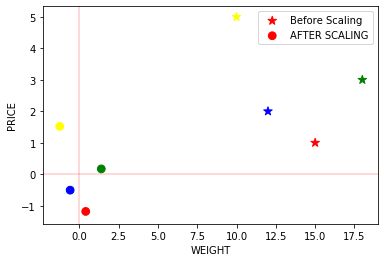

In [8]:
df1 = pd.DataFrame(scaler.fit_transform(df),
                  columns=['WEIGHT','PRICE'],
                  index=['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x ='WEIGHT',y='PRICE',color =['red','green','blue','yellow'],marker ="*",s=80,label ="Before Scaling")
df1.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax);

plt.axhline(0,color ='red',alpha =0.2)
plt.axvline(0,color ='red',alpha =0.2);

# 2) Standard Scaler

- The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1.
- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. If data is not normally distributed, this is not the best Scaler to use.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
df2 = pd.DataFrame(scaler.fit_transform(df),
                  columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

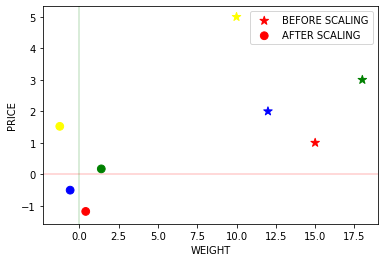

In [11]:
ax = df.plot.scatter(x='WEIGHT',y='PRICE',
                    color=['red','green','blue','yellow'],
                    marker ='*',s=80,label ='BEFORE SCALING');
df2.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0,color='red',alpha = 0.2)
plt.axvline(0,color='green',alpha = 0.2)

# 3) Max Abs Scaler

- Scale each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set is 1.0. It does not shift/center the data and thus does not destroy any sparsity.
- On positive-only data, this Scaler behaves similarly to Min Max Scaler and, therefore, also suffers from the presence of significant outliers.

In [12]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

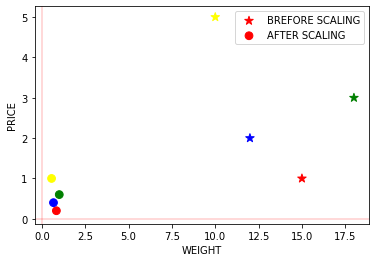

In [13]:
df4 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df4.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

# 4) Robust Scaler


- As the name suggests, this Scaler is robust to outliers. If our data contains many outliers, scaling using the mean and standard deviation of the data won’t work well.
- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). The centering and scaling statistics of this Scaler are based on percentiles and are therefore not influenced by a few numbers of huge marginal outliers. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required.

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

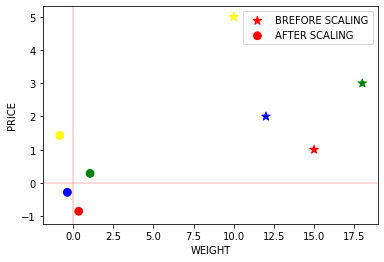

In [15]:
df3 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df3.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

Let’s now see what happens if we introduce an outlier and see the effect of scaling using Standard Scaler and Robust Scaler (a circle shows outlier).

In [16]:
dfr = pd.DataFrame({'WEIGHT': [15, 18, 12,10,50],
                   'PRICE': [1,3,2,5,20]},
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
print(dfr)

           WEIGHT  PRICE
Orange         15      1
Apple          18      3
Banana         12      2
Grape          10      5
Jackfruit      50     20


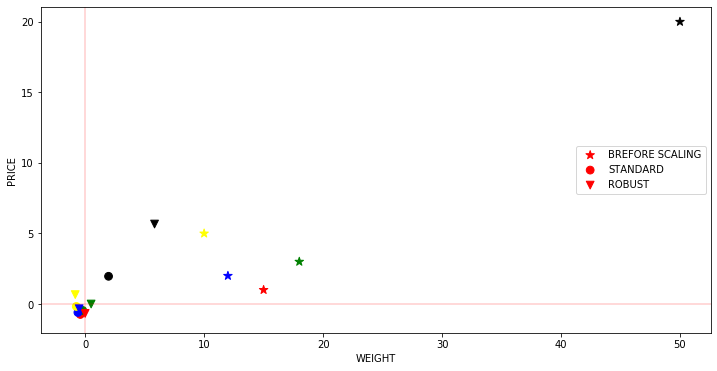

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df21 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
ax = dfr.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow','black'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df21.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow','black'],
                 marker = 'o',s=60,label='STANDARD', ax = ax,figsize=(12,6))
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df31 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
df31.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow','black'],
                 marker = 'v',s=60,label='ROBUST', ax = ax,figsize=(12,6))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

# 5) Quantile Transformer Scaler

- Transform features using quantiles information.
- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is, therefore, a robust pre-processing scheme.
- The cumulative distribution function of a feature is used to project the original values. Note that this transform is non-linear and may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable. This is also sometimes called as Rank scaler.

In [20]:
from sklearn.preprocessing import QuantileTransformer
scalar = QuantileTransformer()

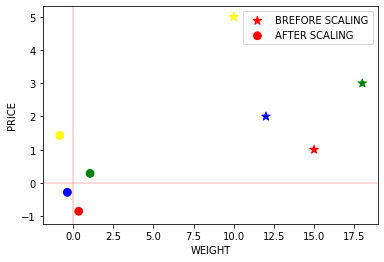

In [21]:
df6 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df6.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax,figsize=(6,4))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

# 6) Unit Vector Scaler


- Scaling is done considering the whole feature vector to be of unit length. This usually means dividing each component by the Euclidean length of the vector (L2 Norm). In some applications (e.g., histogram features), it can be more practical to use the L1 norm of the feature vector.
- Like Min-Max Scaling, the Unit Vector technique produces values of range [0,1]. When dealing with features with hard boundaries, this is quite useful. For example, when dealing with image data, the colors can range from only 0 to 255.


In [22]:
## Unit vector with L1norm
df8 = df.apply(lambda x : x/np.linalg.norm(x,1))
df8

,WEIGHT,PRICE
Orange,0.272727,0.090909
Apple,0.327273,0.272727
Banana,0.218182,0.181818
Grape,0.181818,0.454545


In [23]:
## Unit vector with L1norm
df9 = df.apply(lambda x : x/np.linalg.norm(x,2))
df9

,WEIGHT,PRICE
Orange,0.532666,0.160128
Apple,0.639199,0.480384
Banana,0.426132,0.320256
Grape,0.355110,0.800641
